In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
# 随机生成一些训练数据
np.random.seed(42)  # 设置随机种子


In [72]:
# 生成两类数据点
num_samples = 100
class1 = np.random.randn(num_samples, 2) + [2, 2]  # 第一类数据，围绕(2,2)分布
class2 = np.random.randn(num_samples, 2) + [-2, -2]  # 第二类数据，围绕(-2,-2)分布

In [73]:
# 合并数据并创建标签
X = np.vstack((class1, class2))
y = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # 第一类标签为0，第二类为1

In [74]:
# 逻辑回归模型实现
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    # sigmoid激活函数
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # 训练模型
    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        # 初始化参数
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # 梯度下降
        for _ in range(self.num_iterations):
            # 计算线性输出和预测值
            linear_output = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_output)
            
            # 计算梯度
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)
            
            # 更新参数
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    # 预测函数
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_output)
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [75]:
# 训练模型
model = LogisticRegression(learning_rate=0.1, num_iterations=10000)
model.fit(X, y)

In [76]:
# 预测并计算准确率
predictions = model.predict(X)
accuracy = np.mean(predictions == y)
print(f"模型准确率: {accuracy * 100:.2f}%")

模型准确率: 100.00%


In [77]:
# 绘制结果
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

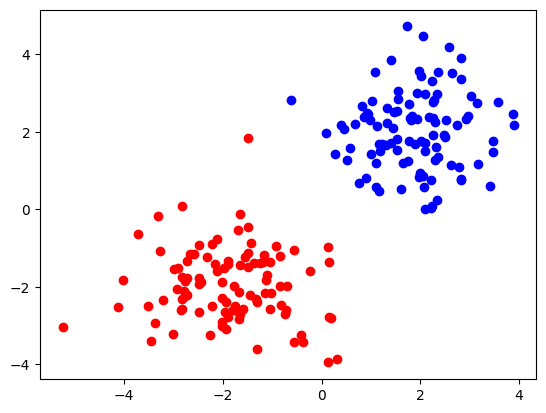

In [78]:
# 绘制数据点
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 0')
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class 1')

In [79]:
# 绘制决策边界
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

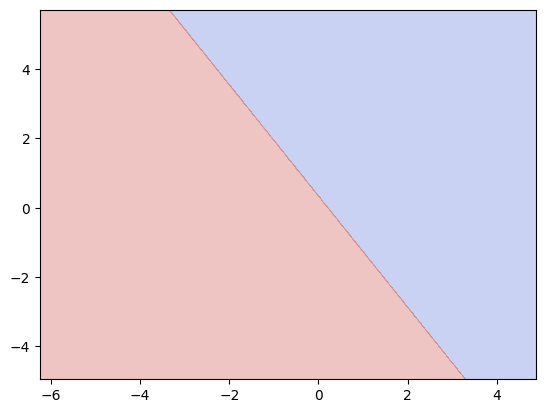

In [80]:
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = np.array(Z).reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.coolwarm)

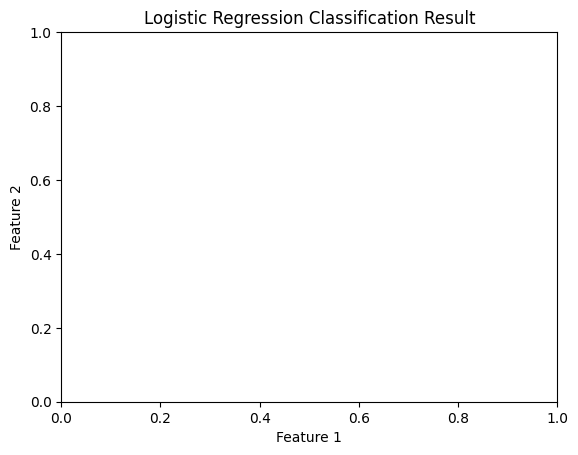

In [69]:
plt.title('Logistic Regression Classification Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()